# Telecommunications Customer Churn Forecasting using Machine Learning: A path to Retention Excellence

In the realm of telecommunications, nurturing existing customer relationships through churn forecasting not only safeguards revenue streams but also builds a bridge to retention excellence. A stitch in time, via predictive analytics, saves five in acquisition costs.

# Introduction

#### Understanding Customer Churn
Customer churn is a pivotal metric in the business world, particularly within the telecom industry. It signifies the departure of customers or subscribers from a particular service or firm, a transition from active engagement to disassociation.

In the telecom industry, customers wield the power to choose from an array of service providers, exhibiting an inclination to switch providers frequently. This environment, highly competitive, witnesses an annual churn rate ranging from 15-25%, emphasizing the dynamic and competitive nature of the industry.

Retaining customers in a personalized manner is a formidable challenge for most firms, given the substantial customer base. Individualized attention to each customer is impractical due to associated costs, potentially outweighing the additional revenue that could be generated. Nonetheless, forecasting customer departure allows businesses to concentrate their retention efforts on these "high risk" clients.

####  The Power of Anticipation

The ability to predict which customers are likely to discontinue their association with a company is paramount in reducing churn. Proactive prediction enables targeted efforts to retain customers who show signs of potential churn, aligning with the broader goal of expanding coverage and fostering customer loyalty.



The crux of success in this industry resides in the customer. Every strategic move and operational decision must orbit around understanding and meeting customer needs, thereby enhancing satisfaction and retention.

Customer churn represents a financial concern. It's substantially more cost-effective to retain existing customers than to embark on acquiring new ones. To mitigate churn and bolster profits, the primary strategic focus of telecom companies is client retention through the implementation of effective strategies.

#### Aim: Predicting Churn for Retention Excellence

This project delves into the realm of telecommunications customer churn forecasting, employing advanced machine learning techniques. The overarching aim is to enhance customer retention strategies, thereby driving retention excellence and fortifying the industry's competitive edge.

In [1]:
# Loading libraries 
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [3]:
#loading data
telco = pd.read_csv('Telco.csv')

telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Dataset Description

The dataset includes information about customers from a telecommunications company. Each row represents a customer, and each column contains customer attributes described in the column Metadata.

#### Customer Churn
Churn: Customers who left within the last month (Yes/No)

#### Services
Phone Service: Customer subscribes to home phone service with the company (Yes/No)  
Multiple Lines: Customer subscribes to multiple telephone lines with the company (Yes/No)  
Internet Service: Customer subscribes to Internet service with the company (No, DSL, Fiber Optic, Cable)  
Online Security: Customer subscribes to additional online security service (Yes/No)  
Online Backup: Customer subscribes to additional online backup service (Yes/No)  
Device Protection Plan: Customer subscribes to additional device protection plan (Yes/No)  
Tech Support: Customer subscribes to additional technical support plan (Yes/No)  
Streaming TV: Customer uses Internet service to stream television programming (Yes/No)  
Streaming Movies: Customer uses Internet service to stream movies (Yes/No)

#### Customer Account Information
Tenure: How long the customer has been with the company  
Contract: Customer's current contract type (Month-to-Month, One Year, Two Year)  
Payment Method: How the customer pays their bill (Bank Withdrawal, Credit Card, Mailed Check)  
Paperless Billing: Customer has chosen paperless billing (Yes/No)  
Monthly Charges: Customer's current total monthly charge for all services  
Total Charges: Customer's total charges calculated to the end of the specified quarter

#### Demographic Information
Gender: Customer’s gender (Male, Female)    
Senior Citizen: Indicates if the customer is 65 or older (Yes/No)  
Partner: Indicates if the customer is married (Yes/No)  
Dependents: Indicates if the customer lives with any dependents (Yes/No)    

This information provides a comprehensive overview of the attributes in the dataset, including customer services, account information, and demographic details.

## Data Exploration and Preparation

In [4]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Convert non-convertible values to NaN
telco['TotalCharges'] = pd.to_numeric(telco['TotalCharges'], errors='coerce')

# Check for missing or NaN values
telco['TotalCharges'].isnull().sum()

11

In [6]:
telco.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

- Churn is the target variable we will use for prediction

In [7]:
# Checking for outliers in the dataset
# Calculate IQR for each feature
Q1 = telco[['tenure', 'MonthlyCharges', 'TotalCharges']].quantile(0.25)
Q3 = telco[['tenure', 'MonthlyCharges', 'TotalCharges']].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = ((telco[['tenure', 'MonthlyCharges', 'TotalCharges']] < lower_bound) | 
            (telco[['tenure', 'MonthlyCharges', 'TotalCharges']] > upper_bound))

# Count the outliers for each feature
outliers_count = outliers.sum()

# Display the count of outliers
print("Count of outliers for each feature:")
print(outliers_count)

Count of outliers for each feature:
tenure            0
MonthlyCharges    0
TotalCharges      0
dtype: int64


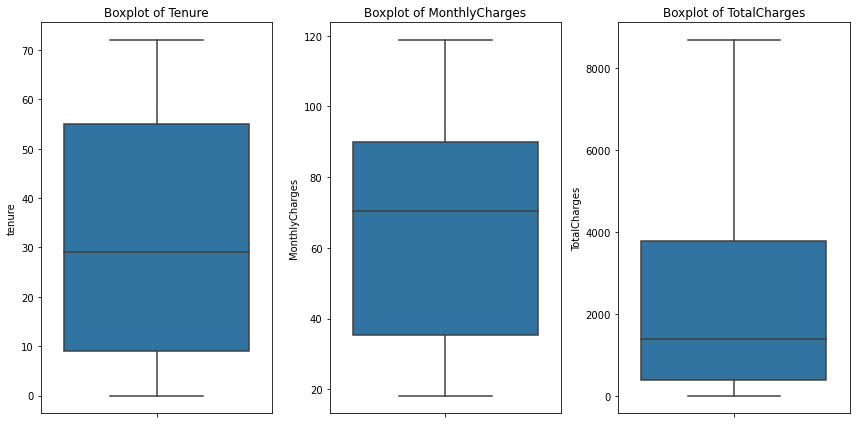

In [8]:
plt.figure(figsize=(12, 6))

# Boxplot for tenure
plt.subplot(1, 3, 1)
sns.boxplot(y='tenure', data=telco)
plt.title('Boxplot of Tenure')
plt.xticks(rotation=90)

# Boxplot for MonthlyCharges
plt.subplot(1, 3, 2)
sns.boxplot(y='MonthlyCharges', data=telco)
plt.title('Boxplot of MonthlyCharges')
plt.xticks(rotation=90)

# Boxplot for TotalCharges
plt.subplot(1, 3, 3)
sns.boxplot(y='TotalCharges', data=telco)
plt.title('Boxplot of TotalCharges')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

- No outliers in the data which is good.

In [9]:
# Checking for missing values
telco.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

- From the above, it shows there are missing values in TotalCharges

In [10]:
# Fill missing values in 'TotalCharges' with the mean
telco['TotalCharges'].fillna(telco['TotalCharges'].mean(), inplace=True)

# convert 'TotalCharges' to float
telco['TotalCharges'] = telco['TotalCharges'].astype(float)

# Checking the data types
telco.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [11]:
telco.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
telco['SeniorCitizen']= telco['SeniorCitizen'].map({0: 'No', 1: 'Yes'})
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
# check internetservice
telco['InternetService'].describe(include=['object', 'bool'])

count            7043
unique              3
top       Fiber optic
freq             3096
Name: InternetService, dtype: object

In [14]:
telco.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2265.000258
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1400.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [15]:
#drop the customerID as it's not necessary
telco = telco.drop(['customerID'], axis = 1)
telco.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Visualization

### Descriptive Analysis

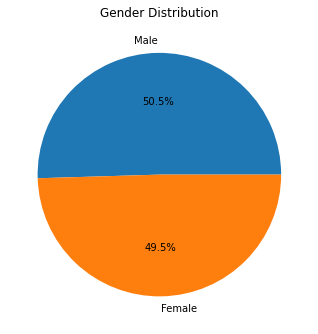

In [16]:
# Gender Distribution (Pie Chart)
gender_counts = telco['gender'].value_counts()
plt.figure(figsize=(12, 10))
plt.subplot(1, 2, 1)
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Gender Distribution');

- Customers are 49.5% Female and 50.5% Male which is almost balanced

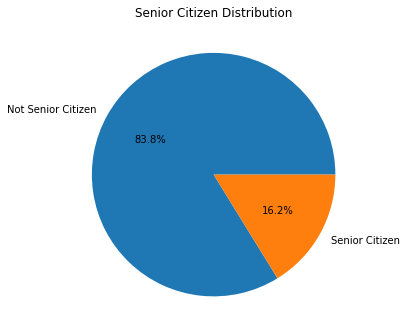

In [17]:
# Senior Citizen Distribution (Pie Chart)
senior_counts = telco['SeniorCitizen'].value_counts()
plt.figure(figsize=(12, 10))
plt.subplot(1, 2, 1)
plt.pie(senior_counts, labels=['Not Senior Citizen', 'Senior Citizen'], autopct='%1.1f%%')
plt.title('Senior Citizen Distribution');

- Most of the Customers 83.8% are not Senior Citizens, with 16.2% of them being Senior Citizens  
ie Senior Citizens are aged 65 years and above.

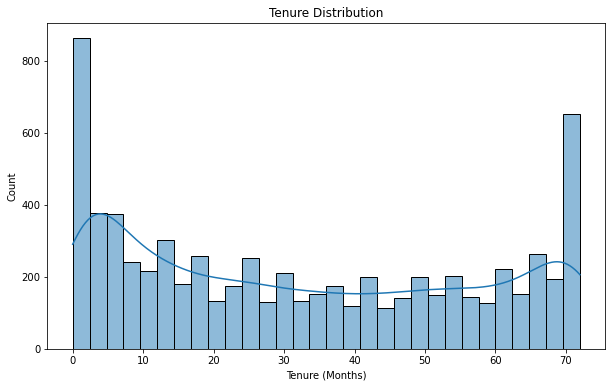

In [18]:
# tenure Distribution
plt.figure(figsize=(10, 6))
sns.histplot(telco['tenure'], bins=30, kde=True)
plt.xlabel('Tenure (Months)')
plt.ylabel('Count')
plt.title('Tenure Distribution')
plt.show()

- New customers are more likely to churn, probably they don't like the service they get.

<Figure size 864x432 with 0 Axes>

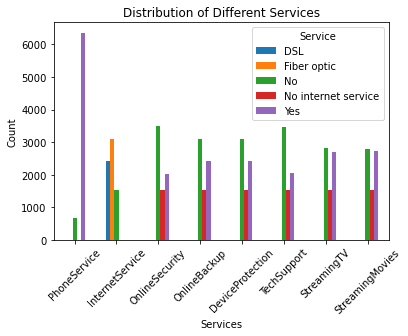

In [19]:
# Services Distribution

services_cols = ['PhoneService', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

services_counts = telco[services_cols].apply(lambda x: x.value_counts()).transpose()

plt.figure(figsize=(12, 6))
services_counts.plot(kind='bar')
plt.xlabel('Services')
plt.ylabel('Count')
plt.title('Distribution of Different Services')
plt.xticks(rotation=45)
plt.legend(title='Service', bbox_to_anchor=(1, 1))
plt.show()

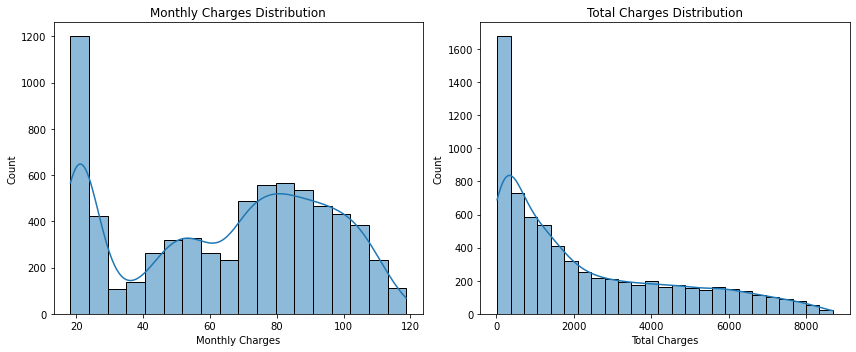

In [20]:
# Monthly and TotalCharges Distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(telco['MonthlyCharges'], kde=True)
plt.xlabel('Monthly Charges')
plt.ylabel('Count')
plt.title('Monthly Charges Distribution')

plt.subplot(1, 2, 2)
sns.histplot(telco['TotalCharges'], kde=True)
plt.xlabel('Total Charges')
plt.ylabel('Count')
plt.title('Total Charges Distribution')

plt.tight_layout()
plt.show()

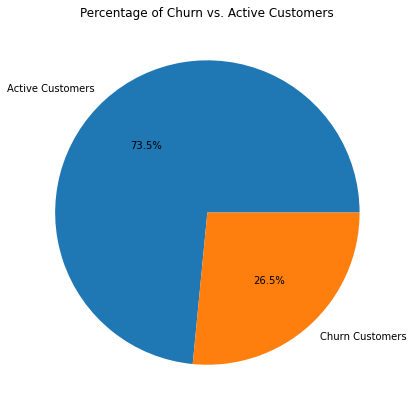

In [21]:
# Percentage of Churn vs. Active Customers
churn_percentage = telco['Churn'].value_counts(normalize=True) * 100

plt.figure(figsize=(7, 7))
plt.pie(churn_percentage, labels=['Active Customers', 'Churn Customers'], autopct='%1.1f%%')
plt.title('Percentage of Churn vs. Active Customers')
plt.show()

### Churn Analysis

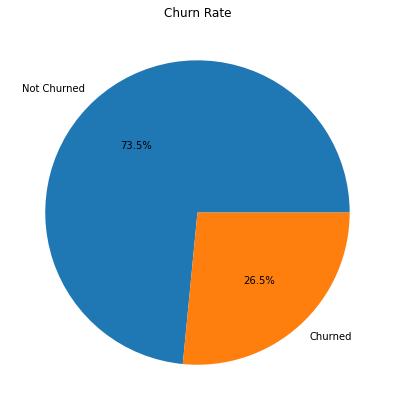

In [22]:
# Churn rate
churn_rate = telco['Churn'].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(churn_rate, labels=['Not Churned', 'Churned'], autopct='%1.1f%%')
plt.title('Churn Rate')
plt.show()

- 26.6% of customers left the company.

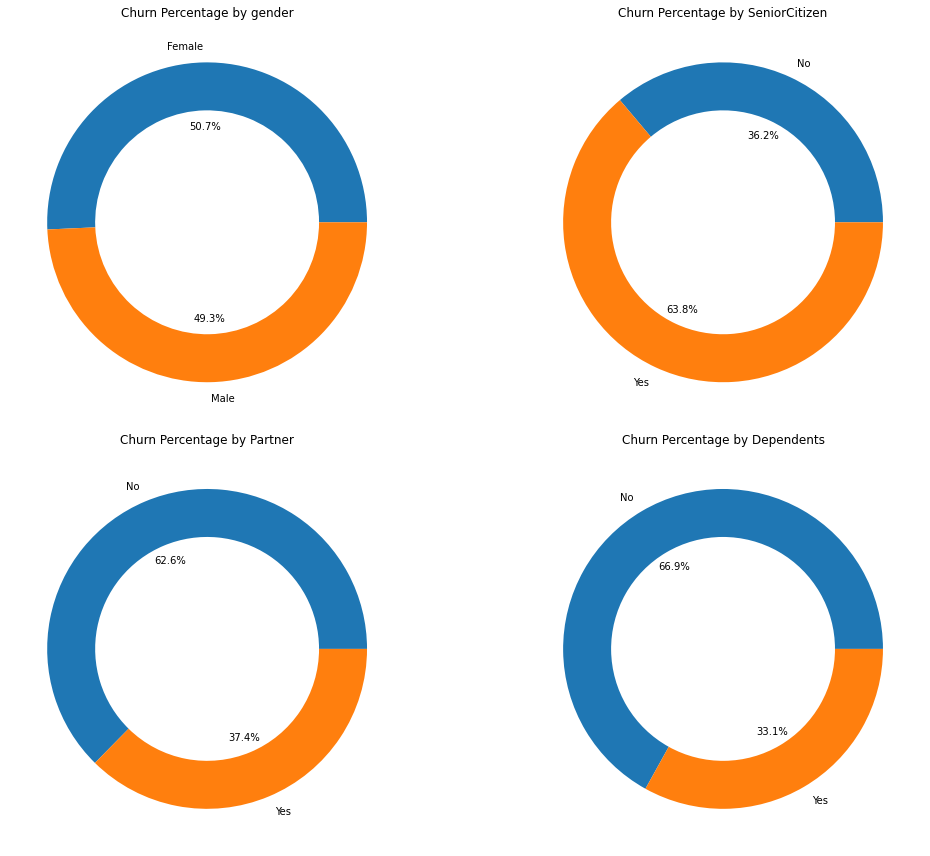

In [23]:
# churn based on Demographic variables
import matplotlib.pyplot as plt

# Calculate churn percentage by demographic variables
demographic_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

plt.figure(figsize=(16, 12))

for i, col in enumerate(demographic_cols, start=1):
    plt.subplot(2, 2, i)
    demographic_churn = telco.groupby([col, 'Churn']).size().unstack()
    demographic_churn_percentage = (demographic_churn['Yes'] / (demographic_churn['No'] + demographic_churn['Yes'])) * 100
    plt.pie(demographic_churn_percentage, labels=demographic_churn_percentage.index, autopct='%1.1f%%', wedgeprops=dict(width=0.3))
    plt.title(f'Churn Percentage by {col}')

plt.tight_layout()
plt.show()

- More Female customers churned as compared to Male
- 63.8% Senior Citizens left as compared to 36.2% who stayed
- Over 30% of customers with Partner and Dependents churned, Probably the serive favours single customers


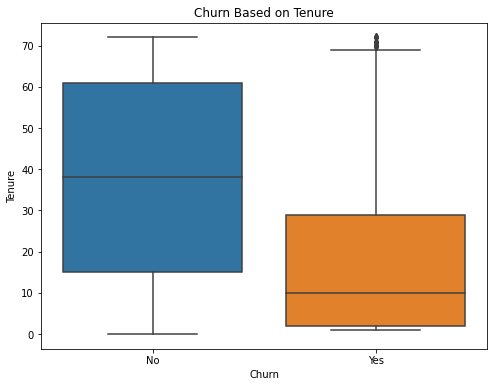

In [24]:
# Churn Based on Tenure
plt.figure(figsize=(8,6))
sns.boxplot(x='Churn', y='tenure', data=telco)
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.title('Churn Based on Tenure')
plt.show;

- New customers are more likely to opt out of the contract.

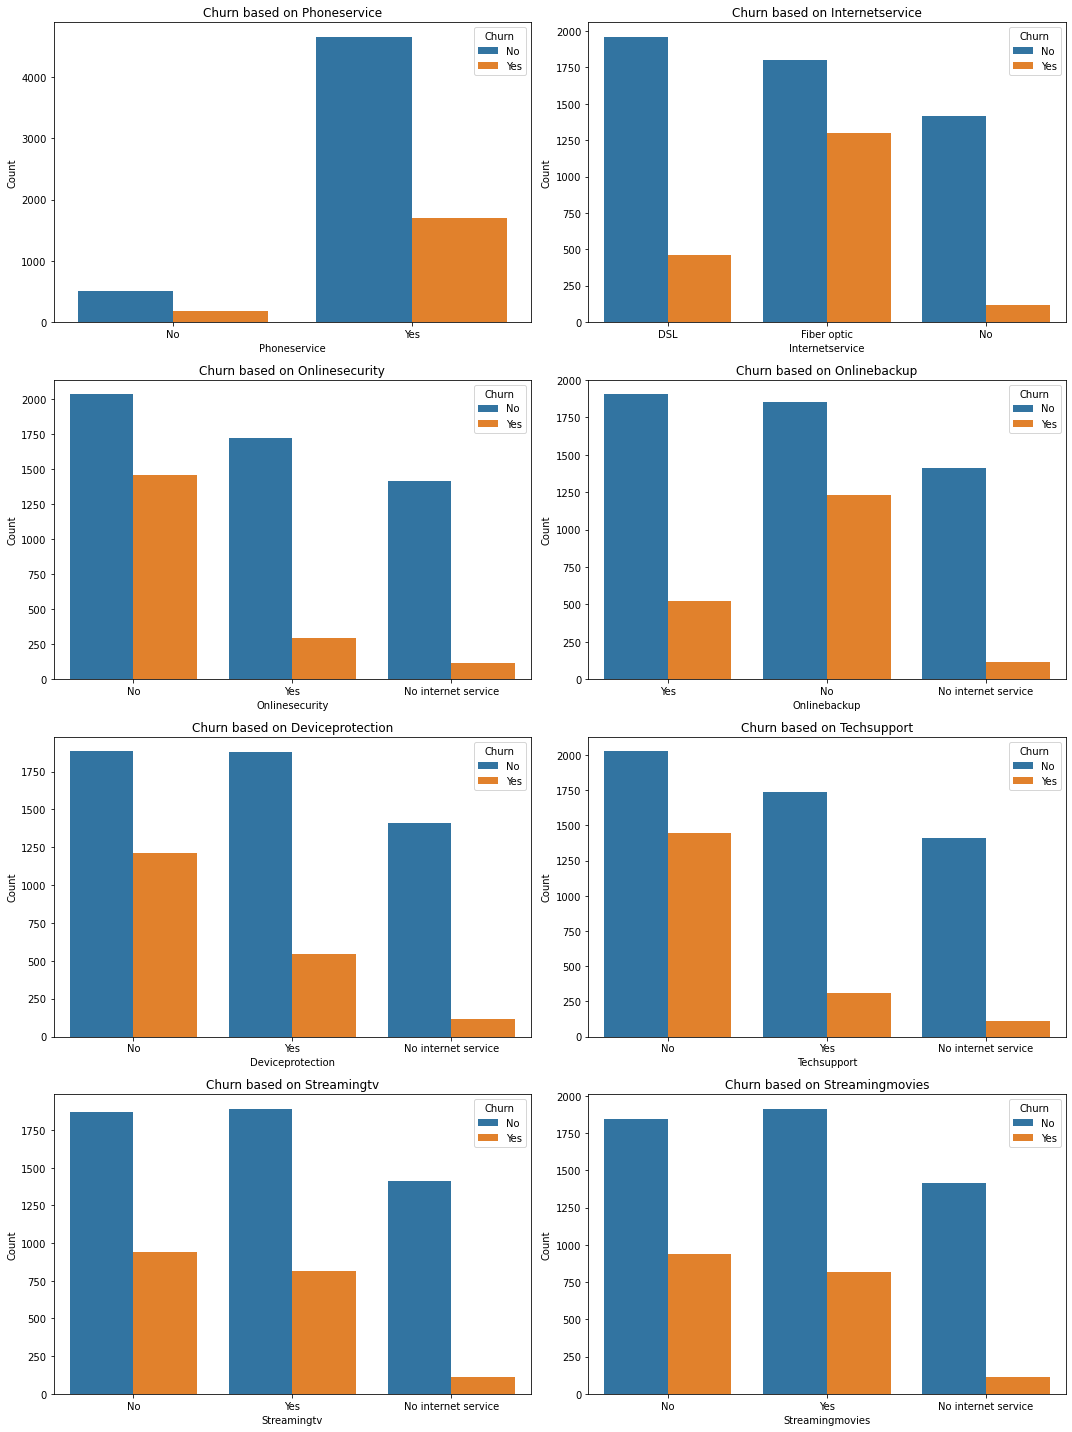

In [25]:
# Churn based on service availability
service_cols = ['PhoneService', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

plt.figure(figsize=(15, 20))

for i, col in enumerate(service_cols, 1):
    plt.subplot(4, 2, i)
    sns.countplot(data=telco, x=col, hue='Churn')
    plt.xlabel(col.capitalize())
    plt.ylabel('Count')
    plt.title(f'Churn based on {col.capitalize()}')
    
plt.tight_layout()
plt.show();

- Customers with Streamingtv and Streamingmovies serivces are likely to churn.  
- Lot of customers use Fibre optic service and they have a high churn rate probably there are not satisfied at the service.  
DSL customers have low churn rate. 
- Custoemers wint no Techsupport and Deviceprotection are likely to port to another service provider.
- A lot of customers without Onlinesecurity and Onlinebackup are likely to migrate to a competitor. 

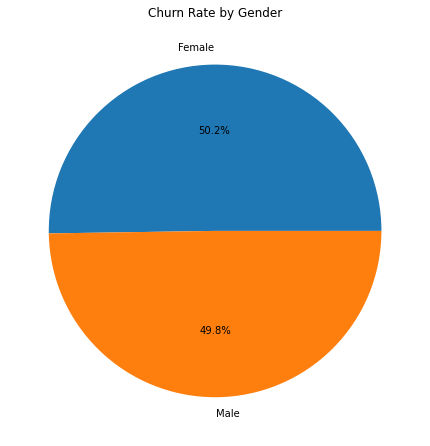

In [26]:
# Churn rate based on gender
churn_by_gender = telco.groupby(['gender', 'Churn']).size().unstack()
plt.figure(figsize=(12, 10))
plt.subplot(1, 2, 2)
plt.pie(churn_by_gender['Yes'], labels=churn_by_gender.index, autopct='%1.1f%%')
plt.title('Churn Rate by Gender')
plt.tight_layout()
plt.show()

- male customers are likely to opt out

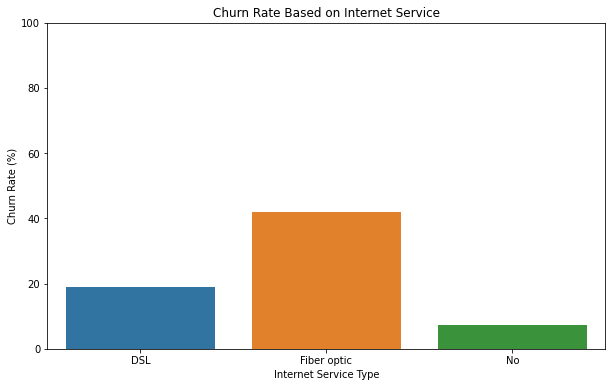

In [27]:
# Convert 'Churn' to binary numerical values
telco['ChurnBinary'] = telco['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Calculate churn rate for each service
service_churn_rate = telco.groupby('InternetService')['ChurnBinary'].mean()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=service_churn_rate.index, y=service_churn_rate.values*100)
plt.xlabel('Internet Service Type')
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate Based on Internet Service')
plt.ylim(0, 100)
plt.show()

### Correlations and Relationships

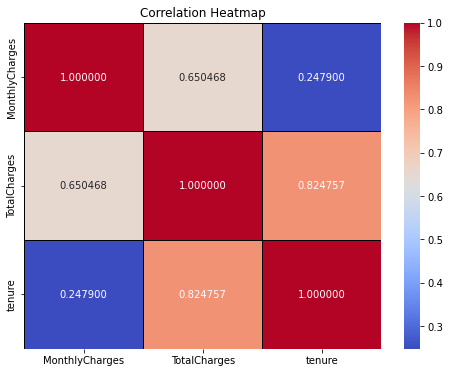

In [28]:
correlation_matrix = telco[['MonthlyCharges', 'TotalCharges', 'tenure']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='2f',linewidths=1, linecolor='black')
plt.title('Correlation Heatmap')
plt.show()

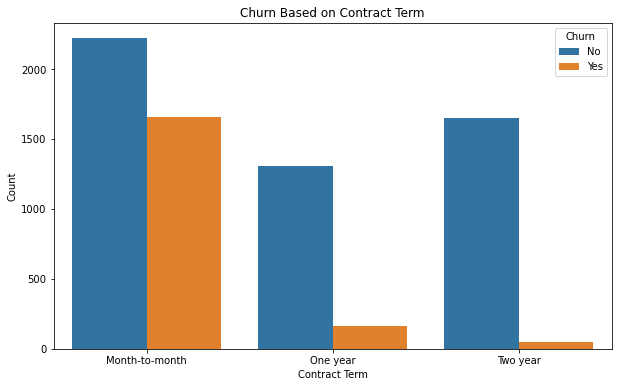

In [29]:
# Contract Term vs Churn
plt.figure(figsize=(10, 6))
sns.countplot(data=telco, x='Contract', hue='Churn')
plt.xlabel('Contract Term')
plt.ylabel('Count')
plt.title('Churn Based on Contract Term');

- Customers with Month-Month Contract opted out of the service as compared with customers with One & Two year contracts

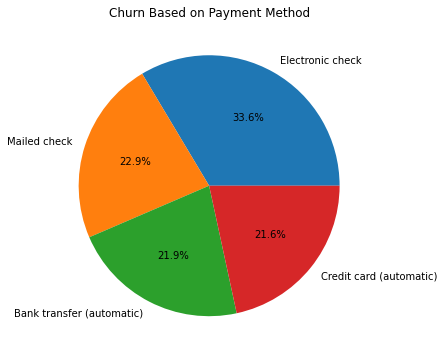

In [30]:
# Churn based on payment method
payment_counts = telco['PaymentMethod'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%')
plt.title('Churn Based on Payment Method')
plt.show()

- Majority of customers who opted out have Electronic check as their Payment Method.
- Other customers who picked Credit card automatic, Bank transfer automatic or Mailed check were less likely to opt out.

### Comparative Analysis

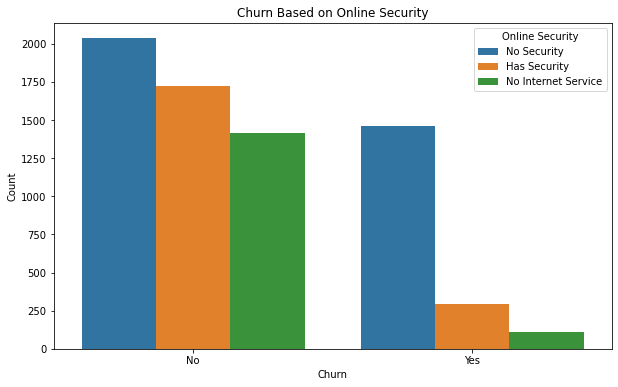

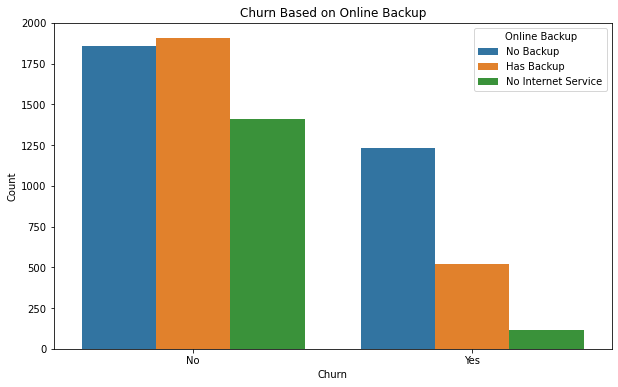

In [31]:
# Count of customers based on churn and online security
churn_security_counts = telco.groupby(['Churn', 'OnlineSecurity']).size().unstack()

# Count plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=telco, x='Churn', hue='OnlineSecurity', hue_order=['No', 'Yes', 'No internet service'])
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Churn Based on Online Security')
plt.legend(title='Online Security', labels=['No Security', 'Has Security', 'No Internet Service'])
plt.show()

# Count of customers based on churn and online backup
churn_backup_counts = telco.groupby(['Churn', 'OnlineBackup']).size().unstack()

# Count plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=telco, x='Churn', hue='OnlineBackup', hue_order=['No', 'Yes', 'No internet service'])
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Churn Based on Online Backup')
plt.legend(title='Online Backup', labels=['No Backup', 'Has Backup', 'No Internet Service'])
plt.show()

- There is a signifact difference in churn rates for customers with Month-to-Month contract as compared to One year and Two year. 

In [32]:
telco = telco.drop(['ChurnBinary'], axis = 1)
telco.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Feature Enginerring

We will create new features that might capture complex patterns or behaviors

In [33]:
# Customer Tenure Categories
def categorize_tenure(tenure):
    if tenure < 12:
        return 'New'
    elif 12 <= tenure < 36:
        return 'Regular'
    else:
        return 'Long-Term'

telco['TenureCategory'] = telco['tenure'].apply(categorize_tenure)

# Total Charges per Month
telco['MonthlyAverageSpending'] = round(telco['TotalCharges'] / telco['tenure'],2)

# Display the updated dataset with new features
telco.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureCategory,MonthlyAverageSpending
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,New,29.85
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,...,No,No,One year,No,Mailed check,56.95,1889.50,No,Regular,55.57
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,New,54.08
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Long-Term,40.91
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,New,75.82


In [34]:
# Contract Flexibility
telco['LongTermContract'] = telco['Contract'].apply(lambda x: 1 if x in ['One year', 'Two year'] else 0)

In [35]:
# Create bins for TotalCharges
bins = [0, 1000, 3000, 6000, np.inf]
labels = ['Low', 'Medium', 'High', 'Very High']
telco['TotalChargesCategory'] = pd.cut(telco['TotalCharges'], bins=bins, labels=labels, right=False)

In [36]:
telco.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureCategory,MonthlyAverageSpending,LongTermContract,TotalChargesCategory
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,...,Month-to-month,Yes,Electronic check,29.85,29.85,No,New,29.85,0,Low
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,...,One year,No,Mailed check,56.95,1889.50,No,Regular,55.57,1,Medium
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,New,54.08,0,Low
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,...,One year,No,Bank transfer (automatic),42.30,1840.75,No,Long-Term,40.91,1,Medium
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,New,75.82,0,Low


In [37]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   gender                  7043 non-null   object  
 1   SeniorCitizen           7043 non-null   object  
 2   Partner                 7043 non-null   object  
 3   Dependents              7043 non-null   object  
 4   tenure                  7043 non-null   int64   
 5   PhoneService            7043 non-null   object  
 6   MultipleLines           7043 non-null   object  
 7   InternetService         7043 non-null   object  
 8   OnlineSecurity          7043 non-null   object  
 9   OnlineBackup            7043 non-null   object  
 10  DeviceProtection        7043 non-null   object  
 11  TechSupport             7043 non-null   object  
 12  StreamingTV             7043 non-null   object  
 13  StreamingMovies         7043 non-null   object  
 14  Contract                

In [38]:
# Remove extra whitespaces from column names in telco DataFrame
telco.columns = telco.columns.str.strip()
telco.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureCategory,MonthlyAverageSpending,LongTermContract,TotalChargesCategory
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,...,Month-to-month,Yes,Electronic check,29.85,29.85,No,New,29.85,0,Low
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,...,One year,No,Mailed check,56.95,1889.50,No,Regular,55.57,1,Medium
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,New,54.08,0,Low
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,...,One year,No,Bank transfer (automatic),42.30,1840.75,No,Long-Term,40.91,1,Medium
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,New,75.82,0,Low


In [39]:
categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',  'Contract', 'PaperlessBilling',
                       'PaymentMethod', 'Churn', 'TenureCategory', 'TotalChargesCategory']

In [40]:
telco_encoded = pd.get_dummies(telco, columns=categorical_columns)
# Display the updated dataset with one-hot encoding and dropped columns
print(telco_encoded.head())

   tenure  MonthlyCharges  TotalCharges  MonthlyAverageSpending  \
0       1           29.85         29.85                   29.85   
1      34           56.95       1889.50                   55.57   
2       2           53.85        108.15                   54.08   
3      45           42.30       1840.75                   40.91   
4       2           70.70        151.65                   75.82   

   LongTermContract  gender_Female  gender_Male  SeniorCitizen_No  \
0                 0              1            0                 1   
1                 1              0            1                 1   
2                 0              0            1                 1   
3                 1              0            1                 1   
4                 0              1            0                 1   

   SeniorCitizen_Yes  Partner_No  ...  PaymentMethod_Mailed check  Churn_No  \
0                  0           0  ...                           0         1   
1                  0    

In [41]:
telco_encoded.head()

,tenure,MonthlyCharges,TotalCharges,MonthlyAverageSpending,LongTermContract,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,...,PaymentMethod_Mailed check,Churn_No,Churn_Yes,TenureCategory_Long-Term,TenureCategory_New,TenureCategory_Regular,TotalChargesCategory_Low,TotalChargesCategory_Medium,TotalChargesCategory_High,TotalChargesCategory_Very High
0,1,29.85,29.85,29.85,0,1,0,1,0,0,...,0,1,0,0,1,0,1,0,0,0
1,34,56.95,1889.50,55.57,1,0,1,1,0,1,...,1,1,0,0,0,1,0,1,0,0
2,2,53.85,108.15,54.08,0,0,1,1,0,1,...,1,0,1,0,1,0,1,0,0,0
3,45,42.30,1840.75,40.91,1,0,1,1,0,1,...,0,1,0,1,0,0,0,1,0,0
4,2,70.70,151.65,75.82,0,1,0,1,0,1,...,0,0,1,0,1,0,1,0,0,0


In [42]:
# Combine the Churn_No and Churn_Yes columns into a single Churn column
telco_encoded['Churn'] = telco_encoded['Churn_Yes']
telco_encoded.drop(['Churn_No', 'Churn_Yes'], axis=1, inplace=True)

# Display the updated DataFrame
print(telco_encoded.head())

   tenure  MonthlyCharges  TotalCharges  MonthlyAverageSpending  \
0       1           29.85         29.85                   29.85   
1      34           56.95       1889.50                   55.57   
2       2           53.85        108.15                   54.08   
3      45           42.30       1840.75                   40.91   
4       2           70.70        151.65                   75.82   

   LongTermContract  gender_Female  gender_Male  SeniorCitizen_No  \
0                 0              1            0                 1   
1                 1              0            1                 1   
2                 0              0            1                 1   
3                 1              0            1                 1   
4                 0              1            0                 1   

   SeniorCitizen_Yes  Partner_No  ...  PaymentMethod_Electronic check  \
0                  0           0  ...                               1   
1                  0           1  ..

In [43]:
telco_encoded.head()

,tenure,MonthlyCharges,TotalCharges,MonthlyAverageSpending,LongTermContract,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,TenureCategory_Long-Term,TenureCategory_New,TenureCategory_Regular,TotalChargesCategory_Low,TotalChargesCategory_Medium,TotalChargesCategory_High,TotalChargesCategory_Very High,Churn
0,1,29.85,29.85,29.85,0,1,0,1,0,0,...,1,0,0,1,0,1,0,0,0,0
1,34,56.95,1889.50,55.57,1,0,1,1,0,1,...,0,1,0,0,1,0,1,0,0,0
2,2,53.85,108.15,54.08,0,0,1,1,0,1,...,0,1,0,1,0,1,0,0,0,1
3,45,42.30,1840.75,40.91,1,0,1,1,0,1,...,0,0,1,0,0,0,1,0,0,0
4,2,70.70,151.65,75.82,0,1,0,1,0,1,...,1,0,0,1,0,1,0,0,0,1


In [44]:
telco_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 56 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   tenure                                   7043 non-null   int64  
 1   MonthlyCharges                           7043 non-null   float64
 2   TotalCharges                             7043 non-null   float64
 3   MonthlyAverageSpending                   7043 non-null   float64
 4   LongTermContract                         7043 non-null   int64  
 5   gender_Female                            7043 non-null   uint8  
 6   gender_Male                              7043 non-null   uint8  
 7   SeniorCitizen_No                         7043 non-null   uint8  
 8   SeniorCitizen_Yes                        7043 non-null   uint8  
 9   Partner_No                               7043 non-null   uint8  
 10  Partner_Yes                              7043 no

### Feature Scaling

In [45]:
# Selecting numerical columns for scaling
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges', 'MonthlyAverageSpending']

# Checking for infinity or very large values in numerical columns
for col in numerical_columns:
    print(f"Checking column: {col}")
    print(f"Infinity values: {telco_encoded[col][np.isinf(telco_encoded[col])]}")
    print(f"Very large values: {telco_encoded[col][telco_encoded[col] > 1e10]}")

Checking column: tenure
Infinity values: Series([], Name: tenure, dtype: int64)
Very large values: Series([], Name: tenure, dtype: int64)
Checking column: MonthlyCharges
Infinity values: Series([], Name: MonthlyCharges, dtype: float64)
Very large values: Series([], Name: MonthlyCharges, dtype: float64)
Checking column: TotalCharges
Infinity values: Series([], Name: TotalCharges, dtype: float64)
Very large values: Series([], Name: TotalCharges, dtype: float64)
Checking column: MonthlyAverageSpending
Infinity values: 488     inf
753     inf
936     inf
1082    inf
1340    inf
3331    inf
3826    inf
4380    inf
5218    inf
6670    inf
6754    inf
Name: MonthlyAverageSpending, dtype: float64
Very large values: 488     inf
753     inf
936     inf
1082    inf
1340    inf
3331    inf
3826    inf
4380    inf
5218    inf
6670    inf
6754    inf
Name: MonthlyAverageSpending, dtype: float64


In [46]:
# Replacing infinite values with the maximum finite value in MonthlyAverageSpending
max_finite_value = telco_encoded['MonthlyAverageSpending'][np.isfinite(telco_encoded['MonthlyAverageSpending'])].max()
telco_encoded['MonthlyAverageSpending'].replace([np.inf, -np.inf], max_finite_value, inplace=True)

In [47]:
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges', 'MonthlyAverageSpending']

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the numerical columns
telco_encoded[numerical_columns] = scaler.fit_transform(telco_encoded[numerical_columns])

In [48]:
telco_encoded.head()

,tenure,MonthlyCharges,TotalCharges,MonthlyAverageSpending,LongTermContract,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,TenureCategory_Long-Term,TenureCategory_New,TenureCategory_Regular,TotalChargesCategory_Low,TotalChargesCategory_Medium,TotalChargesCategory_High,TotalChargesCategory_Very High,Churn
0,-1.277445,-1.160323,-0.994971,-1.158546,0,1,0,1,0,0,...,1,0,0,1,0,1,0,0,0,0
1,0.066327,-0.259629,-0.173876,-0.308099,1,0,1,1,0,1,...,0,1,0,0,1,0,1,0,0,0
2,-1.236724,-0.362660,-0.960399,-0.357366,0,0,1,1,0,1,...,0,1,0,1,0,1,0,0,0,1
3,0.514251,-0.746535,-0.195400,-0.792841,1,0,1,1,0,1,...,0,0,1,0,0,0,1,0,0,0
4,-1.236724,0.197365,-0.941193,0.361480,0,1,0,1,0,1,...,1,0,0,1,0,1,0,0,0,1


### Feature Selection

In [49]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

X = telco_encoded.drop('Churn', axis=1)  # Features
y = telco_encoded['Churn']  # Target

# Create a Logistic Regression model
model = LogisticRegression()

# Apply RFE
num_features_to_select = 15  
rfe = RFE(model, n_features_to_select=num_features_to_select)
fit = rfe.fit(X, y)

# Get the selected features
selected_features = X.columns[fit.support_]

# Display the selected features
print('Selected Features:', selected_features)

Selected Features: Index(['tenure', 'LongTermContract', 'SeniorCitizen_No', 'MultipleLines_No',
       'InternetService_Fiber optic', 'OnlineSecurity_No', 'TechSupport_No',
       'StreamingTV_Yes', 'StreamingMovies_Yes', 'Contract_Month-to-month',
       'Contract_Two year', 'PaperlessBilling_No',
       'PaymentMethod_Electronic check', 'TenureCategory_Long-Term',
       'TotalChargesCategory_Very High'],
      dtype='object')


### Machine Learning

#### Random Forest

In [50]:
X = telco_encoded.drop('Churn', axis=1)
y = telco_encoded['Churn']

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
from sklearn.model_selection import GridSearchCV
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Define the hyperparameters to tune
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}

# Initialize GridSearchCV
rf_grid = GridSearchCV(rf_classifier, rf_params, cv=5, n_jobs=-1)

# Fit the model
rf_grid.fit(X_train, y_train)

# Predict on the test set
rf_pred = rf_grid.predict(X_test)

# Print classification report and confusion matrix
print('Random Forest Classifier:')
print(classification_report(y_test, rf_pred))
print(confusion_matrix(y_test, rf_pred))

Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1036
           1       0.67      0.52      0.59       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409

[[940  96]
 [178 195]]


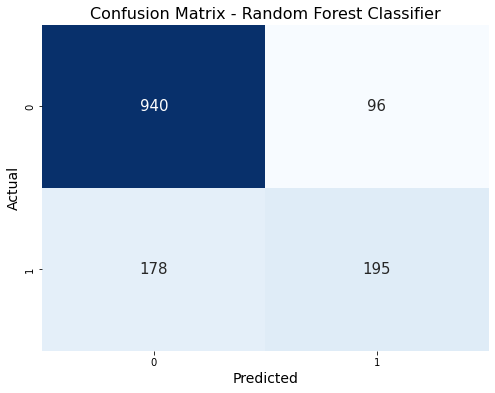

In [52]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, rf_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            annot_kws={'size': 15}, 
            xticklabels=rf_grid.classes_,
            yticklabels=rf_grid.classes_)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Confusion Matrix - Random Forest Classifier', fontsize=16)
plt.show()

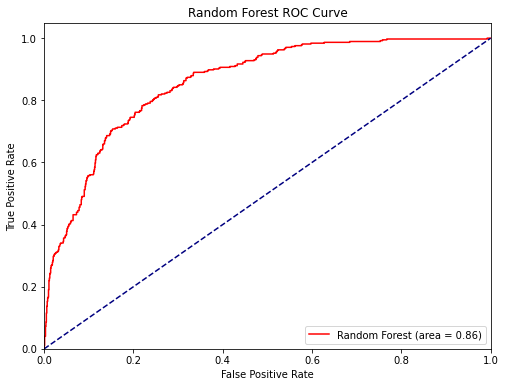

In [53]:
from sklearn.metrics import roc_curve, auc
# Get the best estimator
best_rf = rf_grid.best_estimator_

# Predict probabilities
y_pred_prob = best_rf.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Compute AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='r', label='Random Forest (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend(loc="lower right")
plt.show()

#### Gradient Boosting

In [54]:
gb_classifier = GradientBoostingClassifier()

# Define the hyperparameters to tune
gb_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Initialize GridSearchCV
gb_grid = GridSearchCV(gb_classifier, gb_params, cv=5, n_jobs=-1)

# Fit the model
gb_grid.fit(X_train, y_train)

# Predict on the test set
gb_pred = gb_grid.predict(X_test)

# Print classification report and confusion matrix
print('Gradient Boosting Classifier:')
print(classification_report(y_test, gb_pred))
print(confusion_matrix(y_test, gb_pred))

Gradient Boosting Classifier:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1036
           1       0.67      0.54      0.60       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409

[[937  99]
 [171 202]]


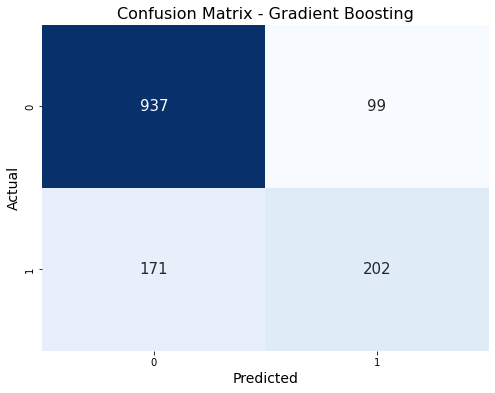

In [55]:
# Generating the confusion matrix
cm = confusion_matrix(y_test, gb_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            annot_kws={'size': 15}, 
            xticklabels=rf_grid.classes_,
            yticklabels=rf_grid.classes_)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Confusion Matrix - Gradient Boosting', fontsize=16)
plt.show()

#### Support Vector Machine (SVM)

In [56]:
svm_classifier = SVC()

# Defining the hyperparameters to tune
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}


svm_grid = GridSearchCV(svm_classifier, svm_params, cv=5, n_jobs=-1)

# Fit the model
svm_grid.fit(X_train, y_train)

# Predicting on the test set
svm_pred = svm_grid.predict(X_test)

# Printing classification report and confusion matrix
print('Support Vector Machine (SVM):')
print(classification_report(y_test, svm_pred))
print(confusion_matrix(y_test, svm_pred))

Support Vector Machine (SVM):
              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1036
           1       0.68      0.52      0.59       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409

[[945  91]
 [179 194]]


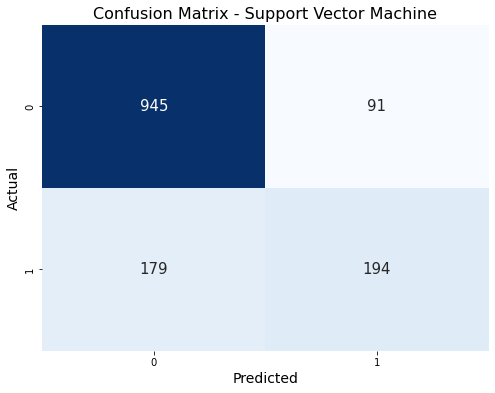

In [57]:
# Generating the confusion matrix
cm = confusion_matrix(y_test, svm_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            annot_kws={'size': 15}, 
            xticklabels=rf_grid.classes_,
            yticklabels=rf_grid.classes_)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Confusion Matrix - Support Vector Machine', fontsize=16)
plt.show()

#### Logistic Regression

In [58]:
lr_classifier = LogisticRegression()

# Defining the hyperparameters to tune
lr_params = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2', 'elasticnet', 'none']
}

lr_grid = GridSearchCV(lr_classifier, lr_params, cv=5, n_jobs=-1)

lr_grid.fit(X_train, y_train)

# Predicting on the test set
lr_pred = lr_grid.predict(X_test)

print('Logistic Regression:')
print(classification_report(y_test, lr_pred))
print(confusion_matrix(y_test, lr_pred))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1036
           1       0.67      0.56      0.61       373

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409

[[931 105]
 [164 209]]


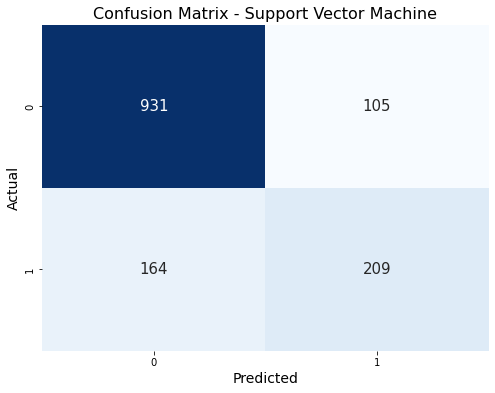

In [59]:
# Generating the confusion matrix
cm = confusion_matrix(y_test, lr_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            annot_kws={'size': 15}, 
            xticklabels=rf_grid.classes_,
            yticklabels=rf_grid.classes_)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Confusion Matrix - Support Vector Machine', fontsize=16)
plt.show()

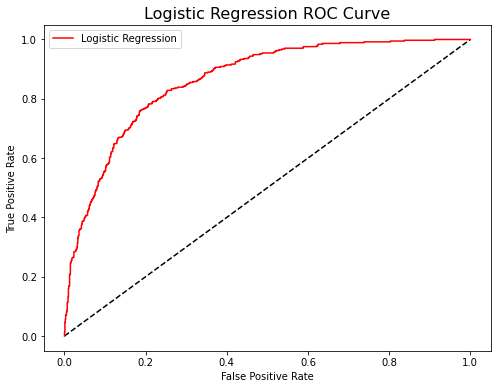

In [60]:
# Predicting probabilities using the best model
lr_pred_prob = lr_grid.predict_proba(X_test)[:,1]

# Calculating false positive rate, true positive rate, and thresholds
fpr_lr, tpr_lr, thresholds = roc_curve(y_test, lr_pred_prob)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression', color="r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve', fontsize=16)
plt.legend(loc='best')
plt.show()

#### K-Nearest Neighbors (KNN)

In [61]:
knn_classifier = KNeighborsClassifier()

# Defining the hyperparameters to tune
knn_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

knn_grid = GridSearchCV(knn_classifier, knn_params, cv=5, n_jobs=-1)

knn_grid.fit(X_train, y_train)

# Predict on the test set
knn_pred = knn_grid.predict(X_test)

print('K-Nearest Neighbors (KNN):')
print(classification_report(y_test, knn_pred))
print(confusion_matrix(y_test, knn_pred))

K-Nearest Neighbors (KNN):
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1036
           1       0.60      0.56      0.58       373

    accuracy                           0.79      1409
   macro avg       0.72      0.71      0.72      1409
weighted avg       0.78      0.79      0.78      1409

[[898 138]
 [163 210]]


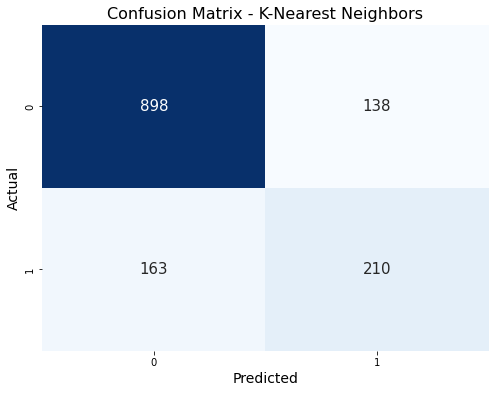

In [62]:
cm = confusion_matrix(y_test, knn_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            annot_kws={'size': 15}, 
            xticklabels=rf_grid.classes_,
            yticklabels=rf_grid.classes_)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Confusion Matrix - K-Nearest Neighbors', fontsize=16)
plt.show()

#### Hyperparameter Tuning for Logistic Regression

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

logreg_params = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Initialize Logistic Regression
logreg = LogisticRegression(random_state=42, max_iter=1000)

# Initialize GridSearchCV
logreg_grid = GridSearchCV(logreg, logreg_params, cv=5, scoring='f1', n_jobs=-1)

# Fit the model
logreg_grid.fit(X_train, y_train)

# Print the best hyperparameters and corresponding F1 score
print("Best Hyperparameters for Logistic Regression:")
print(logreg_grid.best_params_)
print("Best F1 Score:", logreg_grid.best_score_)

# Predict on the test set
logreg_pred = logreg_grid.predict(X_test)

# Print the classification report and confusion matrix
print("Logistic Regression:")
print(classification_report(y_test, logreg_pred))
print(confusion_matrix(y_test, logreg_pred))

Best Hyperparameters for Logistic Regression:
{'C': 10, 'penalty': 'l2'}
Best F1 Score: 0.5779045712051595
Logistic Regression:
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1036
           1       0.67      0.57      0.62       373

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.75      1409
weighted avg       0.80      0.81      0.81      1409

[[932 104]
 [161 212]]


In [64]:
# Use the best hyperparameters from the grid search
best_logreg = LogisticRegression(C=10, penalty='l2', random_state=42, max_iter=1000)

# Fit the model
best_logreg.fit(X_train, y_train)

# Predict on the test set
logreg_predictions = best_logreg.predict(X_test)

# Evaluate the model
print("Logistic Regression with Tuned Hyperparameters:")
print(classification_report(y_test, logreg_predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, logreg_predictions))

Logistic Regression with Tuned Hyperparameters:
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1036
           1       0.67      0.57      0.62       373

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.75      1409
weighted avg       0.80      0.81      0.81      1409

Confusion Matrix:
[[932 104]
 [161 212]]


#### Feature Importance

Feature Importance (Top 10 Features):
                           Feature  Coefficient
19     InternetService_Fiber optic     1.082077
48        TenureCategory_Long-Term     0.510817
38             StreamingMovies_Yes     0.471857
35                 StreamingTV_Yes     0.418018
2                     TotalCharges     0.369242
17               MultipleLines_Yes     0.279563
39         Contract_Month-to-month     0.269391
29            DeviceProtection_Yes     0.185968
46  PaymentMethod_Electronic check     0.185923
21               OnlineSecurity_No     0.171748


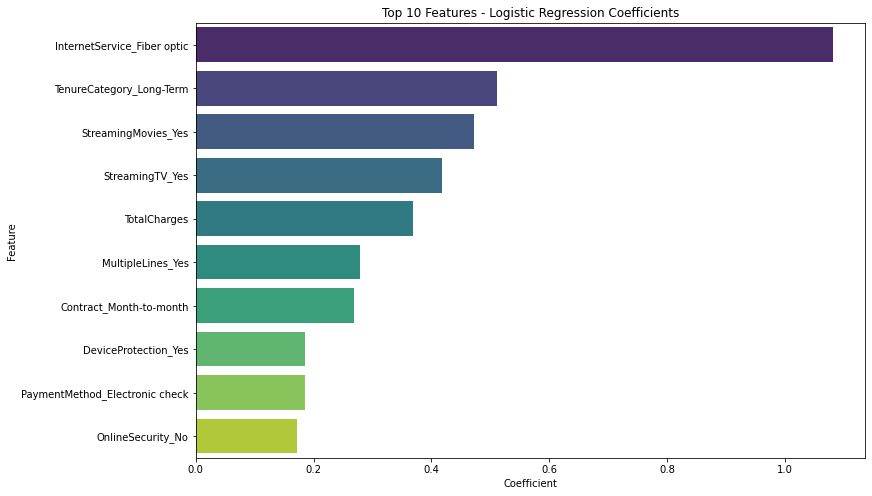

In [65]:
# Fiting the Logistic Regression model with the best hyperparameters using scaled data
best_logreg_model = LogisticRegression(C=10, penalty='l2', random_state=42)
best_logreg_model.fit(X_train, y_train)  # Using the scaled X_train

# Geting the coefficients assigned to each feature
feature_coefficients = best_logreg_model.coef_[0]

# Creating a DataFrame to store feature names and their coefficients
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': feature_coefficients
})

# Sorting the features based on their coefficients
feature_importance_df = feature_importance_df.sort_values(by='Coefficient', ascending=False)

# Displaying the feature importance
print("Feature Importance (Top 10 Features):")
print(feature_importance_df.head(10))

# Visualizing the feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance_df.head(10), palette='viridis')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Top 10 Features - Logistic Regression Coefficients')
plt.show()

In [66]:
# Selecting the top 10 features based on feature importance
top_features = ['InternetService_Fiber optic', 'TenureCategory_Long-Term', 'StreamingMovies_Yes',
                'StreamingTV_Yes', 'TotalCharges', 'MultipleLines_Yes', 'Contract_Month-to-month',
                'DeviceProtection_Yes', 'PaymentMethod_Electronic check', 'OnlineSecurity_No']

# Creating the feature matrix X with only the top features
X_top_features = telco_encoded[top_features]

# Splitting the data into training and testing sets
X_train_top, X_test_top, y_train, y_test = train_test_split(X_top_features, y, test_size=0.2, random_state=42)

# Initializing and training the Logistic Regression model
logreg_top = LogisticRegression(C=10, penalty='l2', random_state=42)
logreg_top.fit(X_train_top, y_train)

# Predicting on the test set
y_pred_top = logreg_top.predict(X_test_top)

# Printing the classification report and confusion matrix
print("Logistic Regression with Top Features:")
print(classification_report(y_test, y_pred_top))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_top))

Logistic Regression with Top Features:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1036
           1       0.67      0.57      0.62       373

    accuracy                           0.81      1409
   macro avg       0.76      0.74      0.75      1409
weighted avg       0.80      0.81      0.81      1409

Confusion Matrix:
[[929 107]
 [159 214]]


In [67]:
import pickle
# Specify the filename for the serialized model
filename = 'logreg_top_model.pkl'

# Serialize the model to a file
with open(filename, 'wb') as file:
    pickle.dump(logreg_top, file)

## Conclusion  

Customer churn poses a significant threat to a company's profitability, underscoring the necessity for effective churn prevention strategies. Understanding and implementing these strategies are key to retaining customers and ensuring sustained business success. The foremost approach to combat customer churn is for a company to intimately understand its customer base. This involves not only identifying customers at risk of churning but also actively working to enhance their satisfaction levels.  

Elevating customer service standards stands as a paramount focus in addressing this challenge. Moreover, cultivating customer loyalty by delivering personalized experiences and specialized services proves instrumental in curtailing churn rates. In addition, conducting thorough surveys among churned customers to comprehend their reasons for leaving empowers a company to proactively mitigate future customer churn. Through a comprehensive blend of these strategies, organizations can effectively minimize customer churn, foster customer loyalty, and ultimately bolster their bottom line.

## Recommendations for Customer Retention

Based on the insights gained from the feature importance analysis, we can devise several strategies and actions to reduce churn and improve customer retention. Here are some recommendations:  

#### Improve Fiber Optic Services: 
Comprehensive investigation into potential issues impacting fiber optic internet services that might be contributing to elevated churn rates. The primary focus should be on elevating service quality by addressing customer concerns promptly. It is crucial to invest in robust optimization of fiber optic internet services to ensure a seamless and superior user experience. Timely resolution of any identified issues and transparent communication of these improvements to customers should be a priority to enhance overall satisfaction and minimize churn.

#### Promote Long-Term Contracts:
Implement a strategy that involves offering enticing incentives and discounts to customers opting for long-term contracts. Emphasize the substantial benefits and cost savings linked to extended commitments. Aso, Develop a range of customizable long-term contract options tailored to diverse customer needs, providing discounts, additional services, or loyalty rewards to incentivize and encourage customers to commit to longer agreements.

#### Enhance Streaming Experience:

Invest substantively in the enhancement of streaming services, recognizing that customers leveraging these services exhibit reduced churn rates. Contemplate enriching the content library, optimizing the user interface, and implementing tailored content recommendations to cater to individual preferences, thereby enhancing user engagement and fostering long-term commitment.

#### Transparent Billing and Communication:

Conduct a thorough review of the pricing structure to guarantee its alignment with both customer expectations and industry benchmarks. Explore opportunities to offer clear, transparent billing information and present cost-effective plan options to customers.

Uphold a commitment to transparency in billing practices, educating customers about the various charges related to their services. Implement proactive and regular communication with customers to clarify their bills, elucidate any queries they may have, and provide comprehensive information about available plans to ensure an informed and satisfied customer base.

#### Targeted Marketing for Multiple Phone Lines:

Craft focused marketing initiatives highlighting the advantages of utilizing multiple phone lines, emphasizing the benefits for both families and businesses. Tailor discounts or packages to incentivize adoption and showcase the value of this offering.

Initiate an in-depth investigation into the reasons behind the increased churn rates among customers with multiple phone lines. Customize offerings to address their unique needs and concerns, ensuring a personalized approach that mitigates churn and fosters long-term commitment to this service.

#### Encourage Fixed-Term Contracts:

Drive customer engagement by promoting fixed-term contracts, offering discounted rates or exclusive features to entice customers into longer commitments. Emphasize the stability and notable benefits that come with opting for fixed-term plans.

Execute targeted marketing campaigns dedicated to showcasing the stability and potential cost savings associated with fixed-term contracts. Implement special promotions and incentives tailored for fixed-term commitments to further encourage customers to opt for extended agreements.

#### User-Friendly Device Protection:

Enhance the accessibility and user-friendliness of device protection services, ensuring a seamless experience for customers. Effectively communicate the value of protecting their devices, highlighting the peace of mind and convenience it offers.

Optimize and market device protection services to clearly demonstrate their value and wide-ranging benefits to customers. Address any concerns or limitations associated with these services, assuring customers of their effectiveness and enhancing their confidence in the protection service.

#### Diverse Payment Options:

Actively promote a range of payment methods, ensuring customers are well-informed about alternatives to electronic checks. Emphasize the ease, security, and advantages of utilizing diverse payment options.

Drive the adoption of payment methods beyond electronic checks to minimize churn. Offer incentives to encourage customers to opt for more stable and convenient payment options, thereby enhancing their overall payment experience.

#### Strengthen Online Security:

Commit to investing in robust online security measures to ensure a safe environment for our customers. Educate customers about the critical importance of online security, emphasizing the safety and protection they receive through enhanced security protocols.

Initiate informative campaigns aimed at raising awareness about online security risks and how our services effectively mitigate these threats. Provide comprehensive tutorials and guides to assist customers in securing their online activities and empowering them with the knowledge needed to navigate the digital landscape securely.

#### Continuous Customer Feedback:

Institute a well-structured feedback loop to consistently gather valuable insights from customers, encompassing their experiences and preferences. Proactively act on this feedback to drive meaningful improvements and showcase our unwavering dedication to meeting customer expectations.

Implement a dynamic system to continuously monitor customer behaviors and responses to our strategies. Iterate and tailor these strategies in real-time based on the gathered feedback and results, ensuring our approach remains adaptive and aligned with customer needs and aspirations.